# Análisis Exploratorio de Datos de Recursos Humanos

Este notebook realiza un análisis básico de los datos de la base de datos `employees` para obtener información relevante desde la perspectiva de RRHH.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# --- Configuración de la Conexión a la Base de Datos ---# Usamos el nombre del servicio 'postgres' como el host, ya que Docker se encarga de la resolución de red.
db_user = 'admin'
db_password = 'admin'
db_host = 'postgres' # Nombre del servicio en docker-compose
db_port = '5432'
db_name = 'employees'

db_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(db_url)

print("Conexión a la base de datos establecida.")

Conexión a la base de datos establecida.


## 1. Conteo de Empleados por Departamento

Este análisis nos muestra el tamaño de cada departamento, lo cual es fundamental para la planificación de recursos.

In [2]:
query_dept_count = """
SELECT d.dept_name, COUNT(de.emp_no) as employee_count
FROM departments d
JOIN dept_emp de ON d.dept_no = de.dept_no
WHERE de.to_date = '9999-01-01' -- Contar solo empleados actuales
GROUP BY d.dept_name
ORDER BY employee_count DESC;
"""

df_dept_count = pd.read_sql(query_dept_count, engine)

print("Conteo de Empleados Actuales por Departamento:")
print(df_dept_count)

Conteo de Empleados Actuales por Departamento:
            dept_name  employee_count
0         Development           61386
1          Production           53304
2               Sales           37701
3    Customer Service           17569
4            Research           15441
5           Marketing           14842
6  Quality Management           14546
7     Human Resources           12898
8             Finance           12437


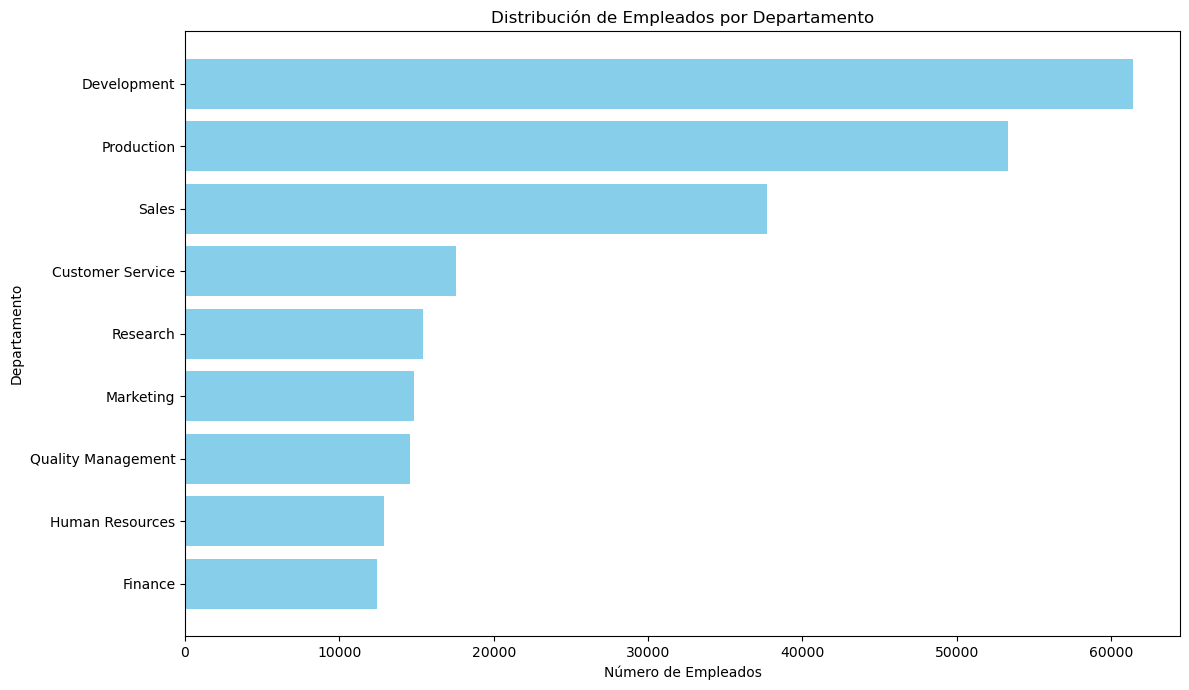

In [4]:
plt.figure(figsize=(12, 7))
plt.barh(df_dept_count['dept_name'], df_dept_count['employee_count'], color='skyblue')
plt.xlabel('Número de Empleados')
plt.ylabel('Departamento')
plt.title('Distribución de Empleados por Departamento')
plt.gca().invert_yaxis() # El departamento más grande arriba
plt.tight_layout()
plt.show()

## 2. Salario Promedio por Cargo

Permite analizar la estructura de compensación y asegurar que sea competitiva y equitativa.

In [5]:
query_avg_salary = """
SELECT t.title, AVG(s.salary) as average_salary
FROM titles t
JOIN salaries s ON t.emp_no = s.emp_no
WHERE t.to_date = '9999-01-01' AND s.to_date = '9999-01-01' -- Solo empleados y salarios actuales
GROUP BY t.title
ORDER BY average_salary DESC;
"""

df_avg_salary = pd.read_sql(query_avg_salary, engine)
df_avg_salary['average_salary'] = df_avg_salary['average_salary'].round(2)

print("Salario Promedio por Cargo (Empleados Actuales):")
print(df_avg_salary)

Salario Promedio por Cargo (Empleados Actuales):
                title  average_salary
0        Senior Staff        80706.50
1             Manager        77723.67
2     Senior Engineer        70823.44
3    Technique Leader        67506.59
4               Staff        67330.67
5            Engineer        59602.74
6  Assistant Engineer        57317.57


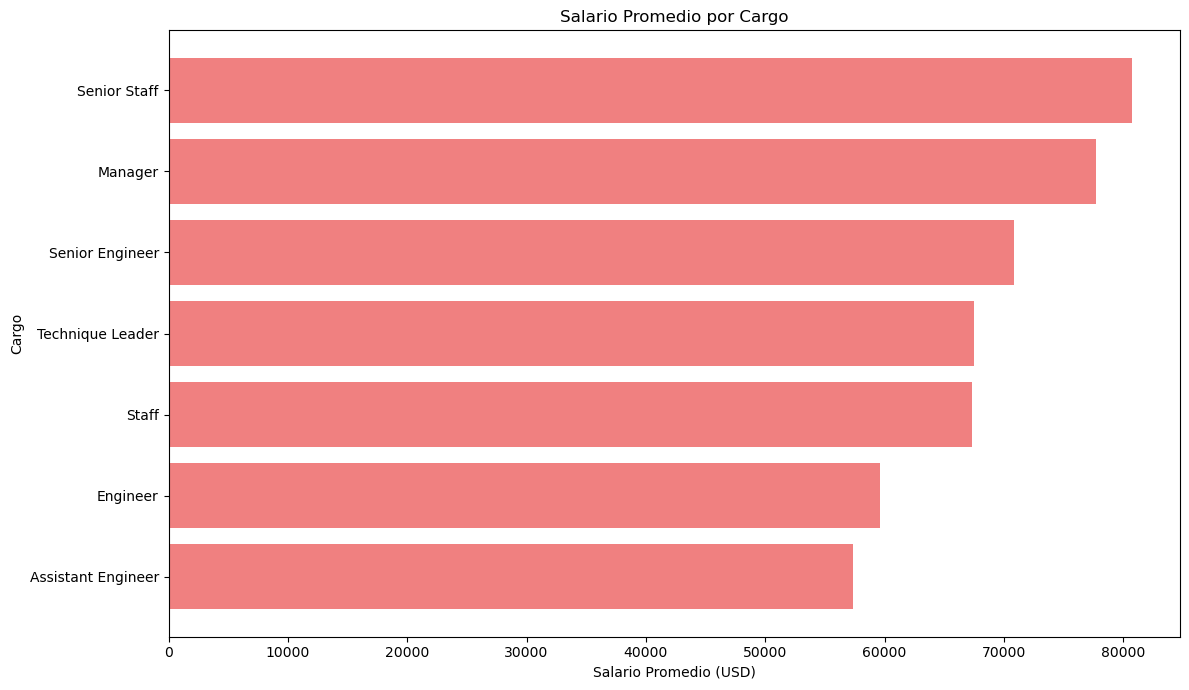

In [6]:
plt.figure(figsize=(12, 7))
plt.barh(df_avg_salary['title'], df_avg_salary['average_salary'], color='lightcoral')
plt.xlabel('Salario Promedio (USD)')
plt.ylabel('Cargo')
plt.title('Salario Promedio por Cargo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. Distribución General de Salarios

Un histograma que muestra la distribución de todos los salarios actuales. Ayuda a identificar la política salarial de la empresa (si se concentra en rangos bajos, medios o altos).

In [7]:
query_all_salaries = """
SELECT salary FROM salaries WHERE to_date = '9999-01-01';
"""

df_all_salaries = pd.read_sql(query_all_salaries, engine)

print(f"Se analizarán {len(df_all_salaries)} salarios actuales.")

Se analizarán 240124 salarios actuales.


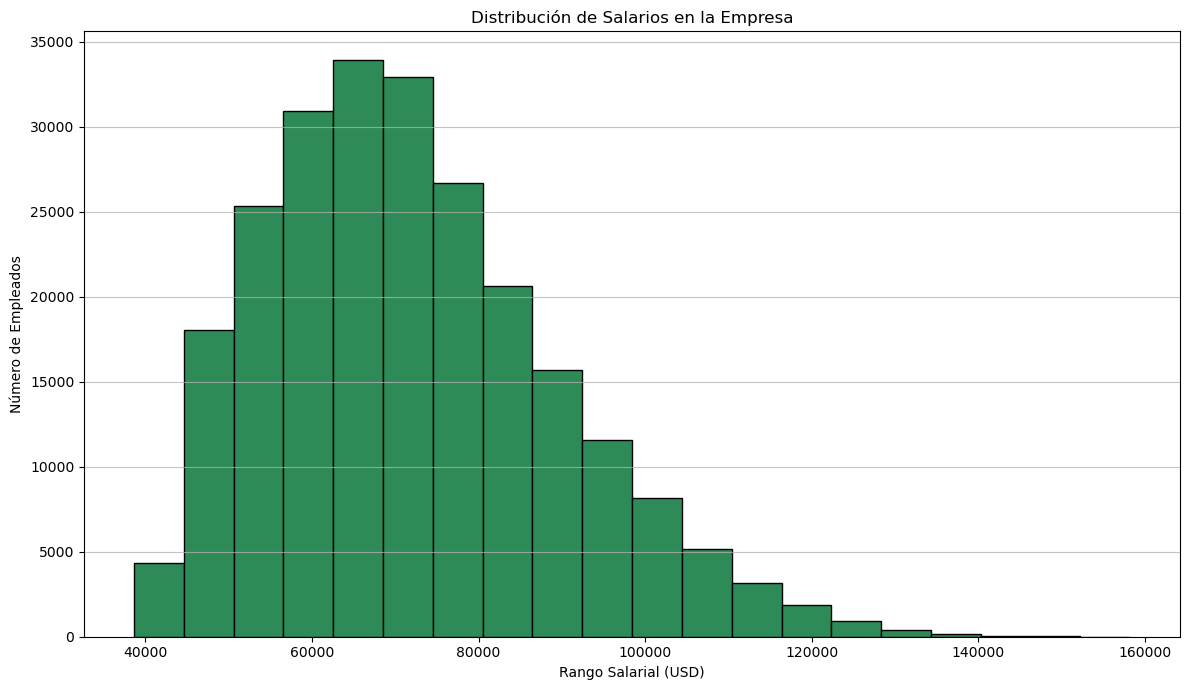

In [8]:
plt.figure(figsize=(12, 7))
plt.hist(df_all_salaries['salary'], bins=20, color='seagreen', edgecolor='black')
plt.title('Distribución de Salarios en la Empresa')
plt.xlabel('Rango Salarial (USD)')
plt.ylabel('Número de Empleados')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()